# Using Machine Learning Techniques to Predict Factors of Winning in the NBA

In this capstone project, I will be using classification techniques and predictive modelling methods such as Logistic Regression, Naïve Bayes, and XGBoost.

__Sections__
1. Question
2. Getting the Data
3. Data Preparation
4. Methods
5. Models
6. Initial Results

# Question
1. How important are each variable within the sport? 
2. Can we determine which factors affect winning chances of the team? 
3. Can we correlate a certain variable and relate it to a team’s chances of winning in the NBA?

# Getting the Data
Imported libraries:    
> panda <br>
> matplotlib <br>
> numpy <br>
> openpyxl <br>
> pathlib <br>
> seaborn <br>
> sklearn <br>
> xgboost <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std
import openpyxl
from pathlib import Path
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier
sns.set()
pd.set_option('display.max_rows', None)
plt.show()

# Data Preparation
Dataset was acquired from https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018

Use read_excel to read the xlsx file acquired from Kaggle

In [2]:
player = pd.read_excel (r'C:\Users\Anthony\Documents\CIND820 Project Data\nba.games.stats.xlsx')

Quick Summary of the Dataset
> The dataset includes every NBA game from 2014-2018 and includes the wins and losses and the team statistics for each game <br>

In [3]:
player.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows%,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,...,8,11,0.727,13,44,26,2,6,15,29


The dataset includes the following variables
> Team <br>
> Game <br>
> Date <br>
> Home <br>
> Opponent <br>
> WINorLOSS <br>
> TeamPoints <br>
> OpponentPoints <br>
> FieldGoals <br>
> FieldGoalsAttempted <br>
> FieldGoals% <br>
> 3PointShots <br>
> 3PointShotsAttempted <br>
> 3PointShots% <br>
> FreeThrows <br>
> FreeThrowsAttempted <br>
> FreeThrows% <br>
> OffRebounds <br>
> TotalRebounds <br>
> Assists <br>
> Steals <br>
> Blocks <br>
> Turnovers <br>
> TotalFouls <br>
> Opp.FieldGoals <br>
> Opp.FieldGoalsAttempted <br>
> Opp.FieldGoals% <br>
> Opp.3PointShots <br>
> 3PointShotsAttempted <br>
> 3PointShots% <br>
> Opp.3PointShotsAttempted <br>
> Opp.3PointShots% <br>
> Opp.FreeThrows <br>
> Opp.FreeThrowsAttempted <br>
> Opp.FreeThrows% <br>
> Opp.OffRebounds <br>
> Opp.TotalRebounds <br>
> Opp.Assists <br>
> Opp.Steals <br>
> Opp.Blocks <br>
> Opp.Turnovers <br>
> Opp.TotalFouls <br>

In [4]:
player.shape

(9840, 40)

In this dataset, we have 9840 rows of games in the NBA and we have the data for 40 variables

In [5]:
player.isnull().sum()

Team                        0
Game                        0
Date                        0
Home                        0
Opponent                    0
WINorLOSS                   0
TeamPoints                  0
OpponentPoints              0
FieldGoals                  0
FieldGoalsAttempted         0
FieldGoals%                 0
3PointShots                 0
3PointShotsAttempted        0
3PointShots%                0
FreeThrows                  0
FreeThrowsAttempted         0
FreeThrows%                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoals              0
Opp.FieldGoalsAttempted     0
Opp.FieldGoals%             0
Opp.3PointShots             0
Opp.3PointShotsAttempted    0
Opp.3PointShots%            0
Opp.FreeThrows              0
Opp.FreeThrowsAttempted     0
Opp.FreeThrows%             0
Opp.OffReb

There are no null values for any row of the dataset

In [6]:
#Check if the WINorLOSS is balanced or not
player['WINorLOSS'].value_counts()
#From this, we can see that WINorLOSS is balanced

W    4920
L    4920
Name: WINorLOSS, dtype: int64

# Initial Results

First, using the cat.codes on the WINorLOSS variable will allow us to categorize it and be able to correlate this variable and the others to determine which variables affect a team's chance of winning or losing

In [7]:
#Categorize WINorLOSS variable
player['WINorLOSS']=player['WINorLOSS'].astype('category').cat.codes
playerCorr = player.corr()

Below is a heatmap to show the correlation between the variables

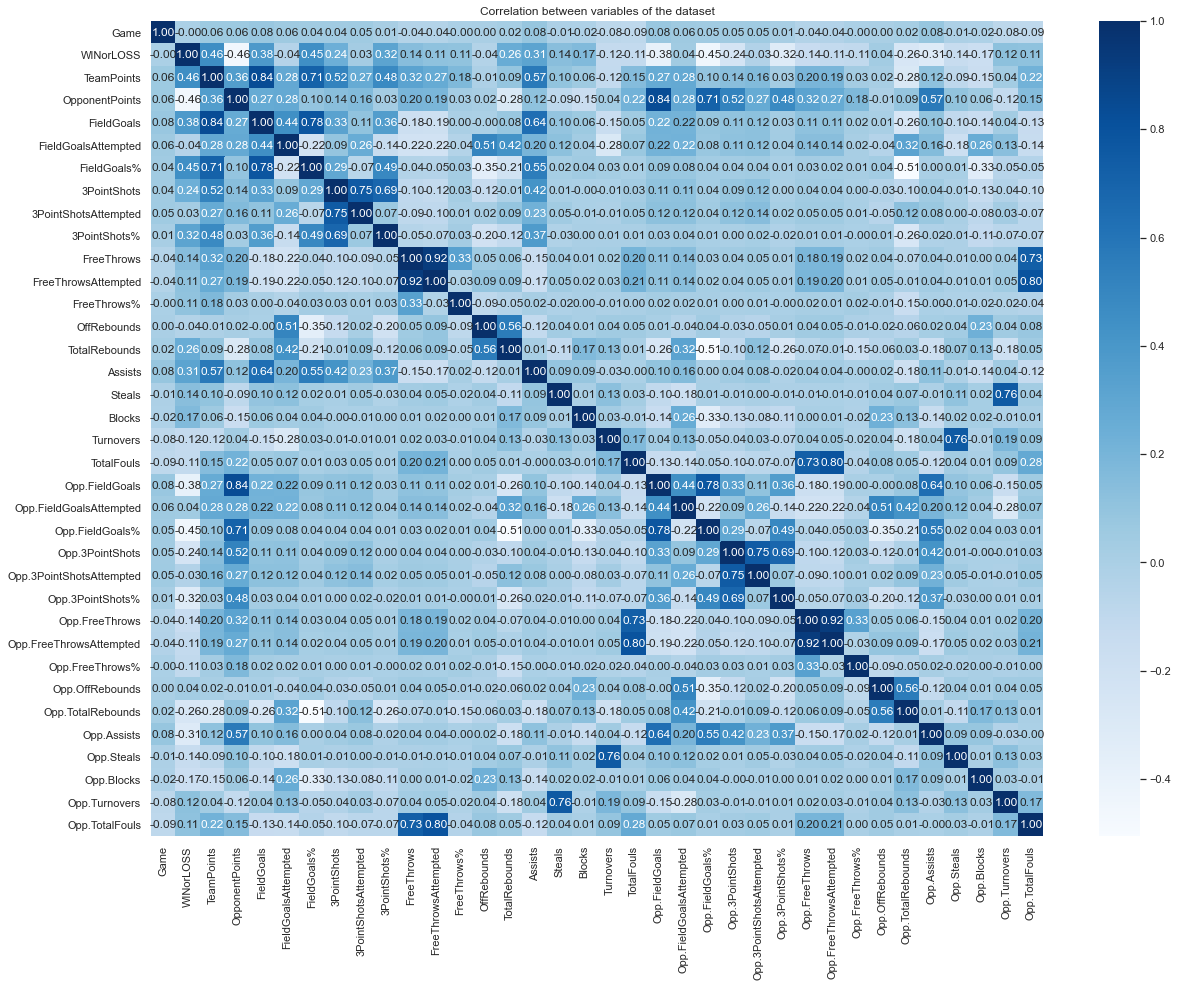

In [8]:
# creating heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(playerCorr,
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation between variables of the dataset')
plt.show()

In [9]:
# correlation team
k = 10
# finding the most correlated variables
cols = playerCorr.nlargest(k, 'WINorLOSS')['WINorLOSS'].index
print(cols)

Index(['WINorLOSS', 'TeamPoints', 'FieldGoals%', 'FieldGoals', '3PointShots%',
       'Assists', 'TotalRebounds', '3PointShots', 'Blocks', 'FreeThrows'],
      dtype='object')


The columns that correlate the most with WINorLOSS are TeamPoints, FieldGoals%, FieldGoals, 3PointShots%, Assists, TotalRebounds, 3PointShots, Blocks, and FreeThrows

<AxesSubplot:xlabel='WINorLOSS', ylabel='FreeThrows'>

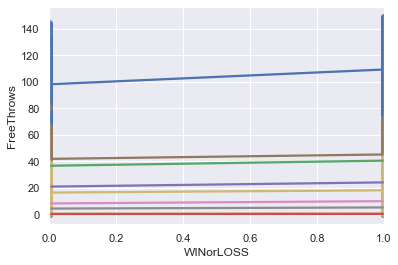

In [10]:
#plot correlation scatter plots
import seaborn as sns
sns.regplot(x=player['WINorLOSS'], y=player['TeamPoints'])
sns.regplot(x=player['WINorLOSS'], y=player['FieldGoals%'])
sns.regplot(x=player['WINorLOSS'], y=player['FieldGoals'])
sns.regplot(x=player['WINorLOSS'], y=player['3PointShots%'])
sns.regplot(x=player['WINorLOSS'], y=player['Assists'])
sns.regplot(x=player['WINorLOSS'], y=player['TotalRebounds'])
sns.regplot(x=player['WINorLOSS'], y=player['3PointShots'])
sns.regplot(x=player['WINorLOSS'], y=player['Blocks'])
sns.regplot(x=player['WINorLOSS'], y=player['FreeThrows'])

# Logistic Regression
- Logistic Regression is our first classification model that we will be using and it is one of the most simple and commonly used machine learning algorithm. It describes and estimates the relationship between one dependent binary variable and independent variables.
- First, we will determine our dependent and independent variables. We will use the variables that correlate the most with the WINorLOSS variable as our independent variable and the WINorLOSS variable as our dependent variable. We will split the data into train and test datasets: X_train, X_test, y_train, and y_test.
- We will run the train and test datasets through the logistic regression model and plot a confusion matrix to determine Accuracy, Precision, and Recall.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

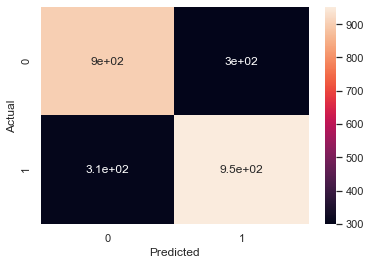

In [11]:
X = player[['TeamPoints', 'FieldGoals%', 'FieldGoals', '3PointShots%','Assists', 'TotalRebounds', '3PointShots', 'Blocks', 'FreeThrows']]
y = player['WINorLOSS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression(solver='saga', max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
#calculate accuracy,precision, recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',2 * (precision * recall) / (precision + recall))

Accuracy:  0.7540650406504065
Precision:  0.7609912070343725
Recall:  0.7567567567567568
F1:  0.7588680749302511


- From the confusion matrix, we get that the accuracy of this logistic regression model gives us a 75.4% accuracy rating

In [13]:
#Run Ten Fold Cross Validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(logistic_regression, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.769 (0.015)


# XGBoost
- XGBoost will be our second classification model and it is an implementation of gradient boosted decision trees designed for speed and performance.
- Use the following code to install the correct libraries to use the XGBoost model

In [14]:
#conda install -c conda-forge xgboost

In [15]:
from xgboost import XGBClassifier

In [16]:
#Create our XGBoost Model and use the split data made to run the model
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric='rmse')

C:\Users\Anthony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
#Create predictions from XGBoost to test for Accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [18]:
def plot_pr(recall,precision,average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: {0:0.6f}'.format(average_precision))
    plt.show()

Accuracy: 74.39%
Mean Absolute Error : 0.25609756097560976


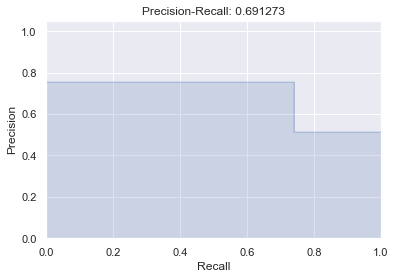

In [19]:
# evaluate predictions
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report
accuracy = accuracy_score(y_test, predictions)
average_precision = average_precision_score(y_test, predictions)
precision, recall, _ = precision_recall_curve(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
plot_pr(recall,precision,average_precision)

We get that the accuracy of the XGBoost model gives us a 74.4% accuracy rating

In [20]:
#Classifcation Report
y_true = np.array(y_test)
print('\n', classification_report(y_true, y_pred.round()))


               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1202
           1       0.75      0.74      0.75      1258

    accuracy                           0.74      2460
   macro avg       0.74      0.74      0.74      2460
weighted avg       0.74      0.74      0.74      2460



In [21]:
#Cross Validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.758 (0.011)


# Naïve Bayes
- Our third classification model, Naive Bayes, is built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

In [22]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_predict = gnb.predict(X_test)

In [23]:
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.7170731707317073


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [25]:
#Cross Validation
scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.725 (0.015)


In [26]:
print(cm)

[[889 313]
 [383 875]]


>Precision is TP/TP+FP<br>
>Recall is TP/TP+FN<br>
>TP = 889<br>
>TN = 875<br>
>FN = 383<br>
>FP = 313<br>

# Are these results acceptable?

- A summary of our results
- Our Logistic regression model returned an accuracy of 75.4%
- Our XGBoost model returned an accuracy of 74.4%
- Our Naïve Bayes model returned an accuracy of 71.7%

- In our literature review, an accuracy rating of 70% and above is an acceptable result. Not every game is played the same and the players are not constant in each game and there will always be factors that cannot be quantified and unpredictable due to the nature of this sport. For example, if the team's best player has been injured for the season, their results for that season will not only impact the chances of winning but also the variables for the entire season.

# Should we try a different approach?

The most common split percentages include:

Train: 80%, Test: 20%
Train: 67%, Test: 33%

So lets try the same models with a different train-test split and calculate our findings again

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

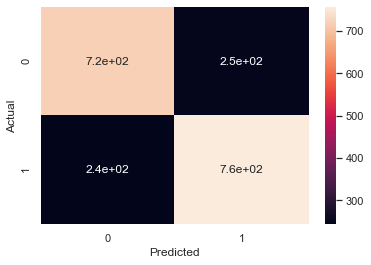

In [27]:
# Logistic Regression with Train: 80% Test: 20%
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size=0.20,random_state=0)
logistic_regression2= LogisticRegression(solver='saga', max_iter=10000)
logistic_regression2.fit(X2_train,y2_train)
y2_pred=logistic_regression2.predict(X2_test)

confusion_matrix = pd.crosstab(y2_test, y2_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [28]:
#Cross Validation
scores = cross_val_score(logistic_regression2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.769 (0.015)


In [29]:
#calculate accuracy,precision, recall, F1
precision2 = precision_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
print('Accuracy: ',metrics.accuracy_score(y2_test, y2_pred))
print('Precision: ',precision2)
print('Recall: ',recall2)
print('F1: ',2 * (precision2 * recall2) / (precision2 + recall2))

Accuracy:  0.7505081300813008
Precision:  0.7532338308457711
Recall:  0.757
F1:  0.7551122194513715


In [30]:
#XGboost with Train: 80% Test: 20%
model2 = XGBClassifier()
model2.fit(X2_train, y2_train, eval_metric='rmse')

C:\Users\Anthony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y2_pred = model2.predict(X2_test)
predictions2 = [round(value) for value in y2_pred]

In [32]:
accuracy2 = accuracy_score(y2_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))
print("Mean Absolute Error : " + str(mean_absolute_error(predictions2, y2_test)))

Accuracy: 73.98%
Mean Absolute Error : 0.2601626016260163


In [33]:
y2_true = np.array(y2_test)
print('\n', classification_report(y2_true, y2_pred.round()))


               precision    recall  f1-score   support

           0       0.73      0.74      0.74       968
           1       0.75      0.74      0.74      1000

    accuracy                           0.74      1968
   macro avg       0.74      0.74      0.74      1968
weighted avg       0.74      0.74      0.74      1968



In [34]:
#Naive Bayes with Train: 80% Test: 20%
gnb2 = GaussianNB()
#Train the model using the training sets
gnb2.fit(X2_train, y2_train)

GaussianNB()

In [35]:
y2_predict = gnb2.predict(X2_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predict)*100)
scores2 = cross_val_score(gnb2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 71.39227642276423
Accuracy: 0.725 (0.015)


In [39]:
cm2 = confusion_matrix(y2_test, y2_predict)
print(cm2)

[[709 259]
 [304 696]]


In [40]:
nb_precision2 = 709/(709+259)
nb_recall2 = 709/(709+304)
print('Precision: ',nb_precision2*100)
print('Recall: ',nb_recall2*100)
print('F1: ',(2 * (nb_precision2 * nb_recall2) / (nb_precision2 + nb_recall2))*100)

Precision:  73.24380165289256
Recall:  69.99012833168806
F1:  71.58001009591115


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

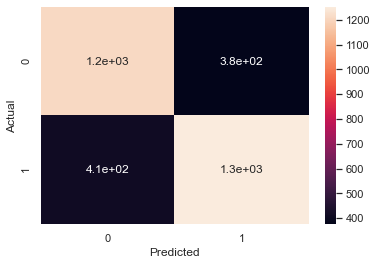

In [41]:
##Logistic Regression with Train: 67% Test: 33%
X3_train,X3_test,y3_train,y3_test = train_test_split(X,y,test_size=0.33,random_state=0)
logistic_regression3= LogisticRegression(solver='saga', max_iter=10000)
logistic_regression3.fit(X3_train,y3_train)
y3_pred=logistic_regression3.predict(X3_test)

confusion_matrix = pd.crosstab(y3_test, y3_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [42]:
#calculate accuracy,precision, recall, F1
precision3 = precision_score(y3_test, y3_pred)
recall3 = recall_score(y3_test, y3_pred)
print('Accuracy: ',metrics.accuracy_score(y3_test, y3_pred))
print('Precision: ',precision3)
print('Recall: ',recall3)
print('F1: ',2 * (precision3 * recall3) / (precision3 + recall3))

Accuracy:  0.7576970443349754
Precision:  0.7695144437615242
Recall:  0.7524038461538461
F1:  0.7608629595867518


In [43]:
#XGboost with Train: 67% Test: 33%
model3 = XGBClassifier()
model3.fit(X3_train, y3_train, eval_metric='rmse')

C:\Users\Anthony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y3_pred = model3.predict(X3_test)
predictions3 = [round(value) for value in y3_pred]

In [45]:
accuracy3 = accuracy_score(y3_test, predictions3)
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))
print("Mean Absolute Error : " + str(mean_absolute_error(predictions3, y3_test)))

Accuracy: 74.66%
Mean Absolute Error : 0.2533866995073892


In [46]:
y3_true = np.array(y3_test)
print('\n', classification_report(y3_true, y3_pred.round()))


               precision    recall  f1-score   support

           0       0.73      0.76      0.74      1584
           1       0.76      0.74      0.75      1664

    accuracy                           0.75      3248
   macro avg       0.75      0.75      0.75      3248
weighted avg       0.75      0.75      0.75      3248



In [47]:
#Naive Bayes with Train: 67% Test: 33%
gnb3 = GaussianNB()
#Train the model using the training sets
gnb3.fit(X3_train, y3_train)

GaussianNB()

In [48]:
y3_predict = gnb3.predict(X3_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y3_test, y3_predict)*100)
scores3 = cross_val_score(gnb3, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores3), std(scores3)))

Accuracy: 71.70566502463053
Accuracy: 0.725 (0.015)


In [51]:
cm3 = confusion_matrix(y3_test, y3_predict)
print(cm3)

[[1176  408]
 [ 511 1153]]


In [52]:
nb_precision3 = 1176/(1176+408)
nb_recall3 = 1176/(1176+511)
print('Precision: ',nb_precision3*100)
print('Recall: ',nb_recall3*100)
print('F1: ',(2 * (nb_precision3 * nb_recall3) / (nb_precision3 + nb_recall3))*100)

Precision:  74.24242424242425
Recall:  69.70954356846472
F1:  71.90461632528279


# Trying new XGBoost Parameters

In [53]:
#try XGboost parameter
new_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [54]:
new_model.fit(X_train, y_train, eval_metric='rmse')
new_y_pred = new_model.predict(X_test)
new_predictions = [round(value) for value in new_y_pred]
accuracy = accuracy_score(y_test, new_predictions)
average_precision = average_precision_score(y_test, new_predictions)
precision, recall, _ = precision_recall_curve(y_test,new_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Mean Absolute Error : " + str(mean_absolute_error(new_predictions, y_test)))

C:\Users\Anthony\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 73.94%
Mean Absolute Error : 0.2605691056910569
